In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/Users/alsaeed531/Downloads/GA/5 Sub/smoking.csv")
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [2]:
df.columns.tolist()

['ID',
 'gender',
 'age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'oral',
 'dental caries',
 'tartar',
 'smoking']

In [3]:
df["smoking"].value_counts()

smoking
0    35237
1    20455
Name: count, dtype: int64

In [4]:
df["smoking"].value_counts(normalize=True) * 100

smoking
0    63.271206
1    36.728794
Name: proportion, dtype: float64

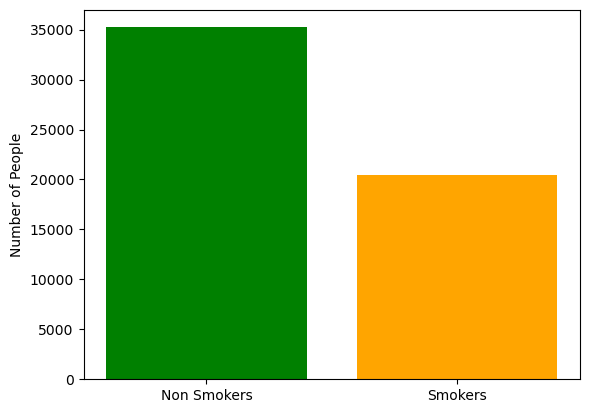

In [5]:
counts = df["smoking"].value_counts()
labels = ["Non Smokers", "Smokers"]

plt.bar(labels, counts, color=["green", "orange"])
plt.ylabel("Number of People")
plt.show()

In [6]:
df["gender"].value_counts()

gender
M    35401
F    20291
Name: count, dtype: int64

In [8]:
df["gender"] = df["gender"].replace({"M": "Male", "F": "Female"})
df["gender"].value_counts()

gender
Male      35401
Female    20291
Name: count, dtype: int64

In [11]:
df.groupby(["gender", "smoking"]).size()

gender  smoking
Female  0          19432
        1            859
Male    0          15805
        1          19596
dtype: int64

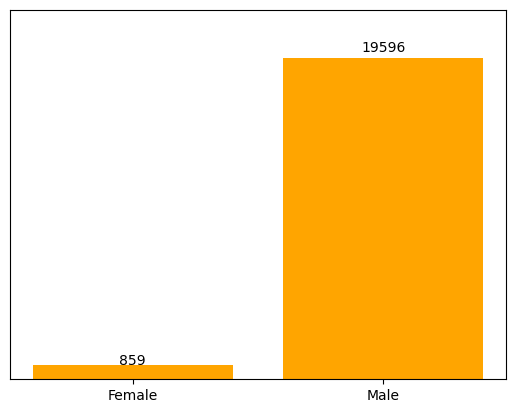

In [12]:
labels = ["Female", "Male"]
values = [859, 19596]

plt.bar(labels, values, color="orange")
plt.gca().set_yticks([])
plt.ylim(0, max(values) * 1.15)
for i, v in enumerate(values):
    plt.text(i, v + (v * 0.02), str(v), ha="center")

plt.show()

In [13]:
smokers_under_18 = df[(df["age"] < 18) & (df["smoking"] == 1)].shape[0]
smokers_over_18 = df[(df["age"] >= 18) & (df["smoking"] == 1)].shape[0]
nonsmokers_under_18 = df[(df["age"] < 18) & (df["smoking"] == 0)].shape[0]
nonsmokers_over_18 = df[(df["age"] >= 18) & (df["smoking"] == 0)].shape[0]

print("Smokers under 18:", smokers_under_18)
print("Smokers 18 and older:", smokers_over_18)
print("Non-Smokers under 18:", nonsmokers_under_18)
print("Non-Smokers 18 and older:", nonsmokers_over_18)

Smokers under 18: 0
Smokers 18 and older: 20455
Non-Smokers under 18: 0
Non-Smokers 18 and older: 35237


In [15]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = [c for c in numeric_cols if c not in ["ID","age", "smoking"]]

avg = df.groupby("smoking")[numeric_cols].mean().T
avg.columns = ["Non Smokers", "Smokers"]
avg

,Non Smokers,Smokers
height(cm),161.870477,169.436324
weight(kg),62.907455,70.959668
waist(cm),80.447669,84.800518
eyesight(left),0.989920,1.051733
eyesight(right),0.984110,1.047636
hearing(left),1.028379,1.020777
hearing(right),1.028436,1.022195
systolic,120.732440,122.806502
relaxation,75.206090,77.380787
fasting blood sugar,97.723501,102.049328


In [17]:
cols = ["eyesight(left)", "eyesight(right)", "hearing(left)", "hearing(right)"]

vision_hearing = df.groupby("smoking")[cols].mean().round(3)
vision_hearing.index = ["Non-Smokers", "Smokers"]
vision_hearing

,eyesight(left),eyesight(right),hearing(left),hearing(right)
Non-Smokers,0.990,0.984,1.028,1.028
Smokers,1.052,1.048,1.021,1.022


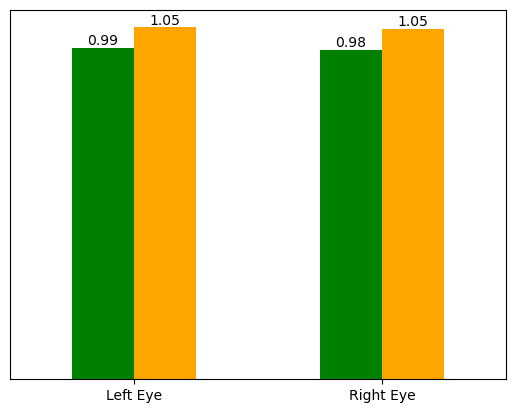

In [18]:
eyesight = vision_hearing[["eyesight(left)", "eyesight(right)"]].T
eyesight.index = ["Left Eye", "Right Eye"]
eyesight.columns = ["Non Smokers", "Smokers"]

ax = eyesight.plot(kind="bar", color=["green", "orange"])
plt.xticks(rotation=0)
plt.gca().set_yticks([])

for bars in ax.containers:
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h, round(h, 2),
                ha="center", va="bottom")

plt.legend().remove()
plt.show()

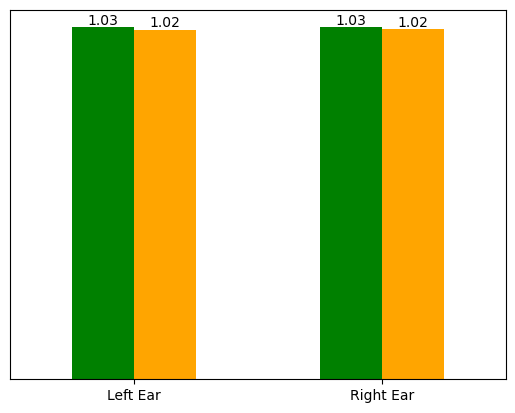

In [19]:
hearing = vision_hearing[["hearing(left)", "hearing(right)"]].T
hearing.index = ["Left Ear", "Right Ear"]
hearing.columns = ["Non Smokers", "Smokers"]

ax = hearing.plot(kind="bar", color=["green", "orange"])
plt.xticks(rotation=0)
plt.gca().set_yticks([])

for bars in ax.containers:
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h, round(h, 2),
                ha="center", va="bottom")

plt.legend().remove()
plt.show()

In [20]:
cols = ["height(cm)", "weight(kg)"]

avg_hw = df.groupby("smoking")[cols].mean().round(2)
avg_hw.index = ["Non Smokers", "Smokers"]

avg_hw

,height(cm),weight(kg)
Non Smokers,161.87,62.91
Smokers,169.44,70.96


In [21]:
cols = ["height(cm)", "weight(kg)"]

gender_hw = df.groupby(["gender", "smoking"])[cols].mean().round(2).reset_index()
gender_hw

,gender,smoking,height(cm),weight(kg)
0,Female,0,155.60,56.11
1,Female,1,156.65,56.45
2,Male,0,169.58,71.26
3,Male,1,170.00,71.60


In [22]:
df["tartar"].unique()

array(['Y', 'N'], dtype=object)

In [23]:
df["tartar_num"] = df["tartar"].map({"N": 0, "Y": 1})

In [24]:
cols = ["dental caries", "tartar_num"]

group_counts = df.groupby("smoking")[cols].sum()
group_totals = df.groupby("smoking").size()

proportions = (group_counts.div(group_totals, axis=0) * 100).round(1)
proportions.index = ["Non Smokers", "Smokers"]

proportions

,dental caries,tartar_num
Non Smokers,18.1,51.8
Smokers,26.9,62.0


In [33]:
smokers = df[df["smoking"] == 1]
nonsmokers = df[df["smoking"] == 0]

def oral_stats(sub):
    total = len(sub)
    caries_only = ((sub["dental caries"] == 1) & (sub["tartar_num"] == 0)).sum()
    tartar_only = ((sub["dental caries"] == 0) & (sub["tartar_num"] == 1)).sum()
    both = ((sub["dental caries"] == 1) & (sub["tartar_num"] == 1)).sum()
    none = ((sub["dental caries"] == 0) & (sub["tartar_num"] == 0)).sum()
    return pd.Series({
        "Caries Only %": round(caries_only / total * 100, 1),
        "Tartar Only %": round(tartar_only / total * 100, 1),
        "Both %": round(both / total * 100, 1),
        "None %": round(none / total * 100, 1)
    })

oral_table = pd.DataFrame({
    "Non Smokers": oral_stats(nonsmokers),
    "Smokers": oral_stats(smokers)
})

oral_table

,Non Smokers,Smokers
Caries Only %,5.6,6.7
Tartar Only %,39.3,41.7
Both %,12.5,20.3
None %,42.6,31.4


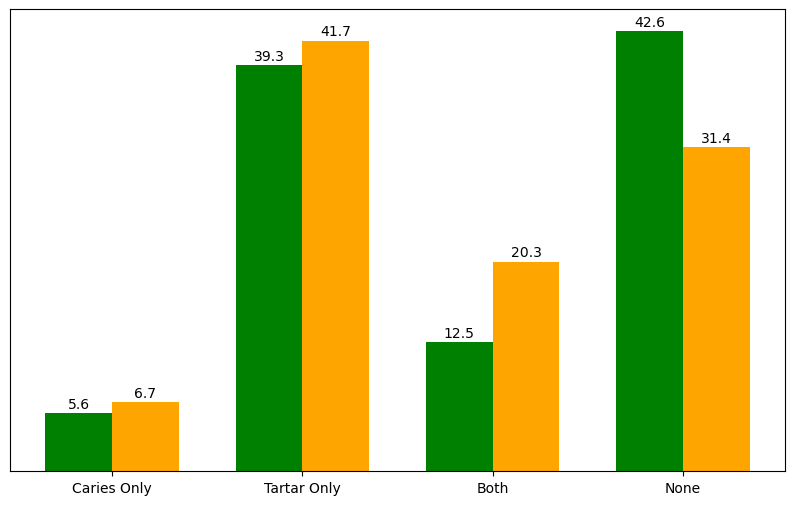

In [26]:
labels = ["Caries Only", "Tartar Only", "Both", "None"]
non_smokers = [5.6, 39.3, 12.5, 42.6]
smokers = [6.7, 41.7, 20.3, 31.4]

x = np.arange(len(labels))
w = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - w/2, non_smokers, w, color="green")
plt.bar(x + w/2, smokers, w, color="orange")
plt.xticks(x, labels, rotation=0)
plt.gca().set_yticks([])
for i, v in enumerate(non_smokers):
    plt.text(i - w/2, v + 0.5, str(v), ha="center")
for i, v in enumerate(smokers):
    plt.text(i + w/2, v + 0.5, str(v), ha="center")

plt.show()

In [35]:
hdl = df.groupby("smoking")["HDL"].mean().round(2)
hdl.index = ["Non Smokers", "Smokers"]
hdl

Non Smokers    59.29
Smokers        53.84
Name: HDL, dtype: float64

In [116]:
ldl = df.groupby("smoking")["LDL"].mean().round(2)
ldl.index = ["Non Smokers", "Smokers"]
ldl

Non Smokers    116.37
Smokers        112.54
Name: LDL, dtype: float64

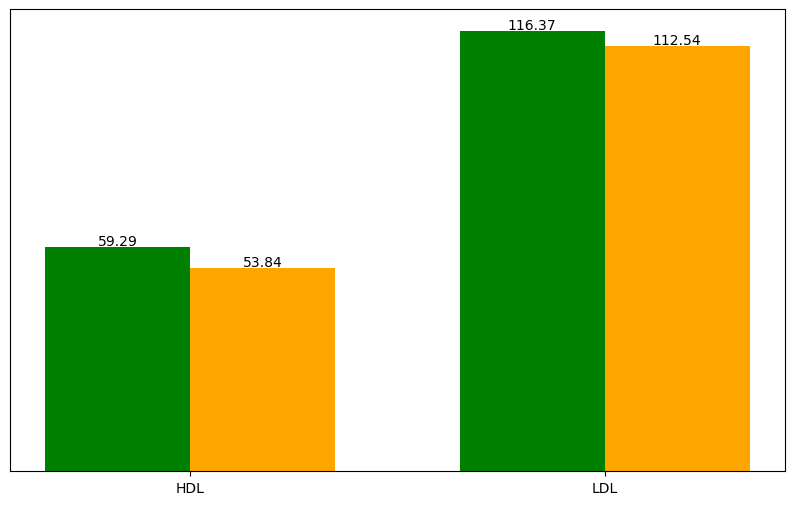

In [45]:
labels = ["HDL", "LDL"]

non_smokers = [hdl["Non Smokers"], ldl["Non Smokers"]]
smokers = [hdl["Smokers"], ldl["Smokers"]]

x = np.arange(len(labels))
w = 0.35

plt.figure(figsize=(10,6))

plt.bar(x - w/2, non_smokers, w, color="green")
plt.bar(x + w/2, smokers, w, color="orange")

plt.xticks(x, labels)
plt.gca().set_yticks([])

for i, v in enumerate(non_smokers):
    plt.text(i - w/2, v + 0.5, str(v), ha="center")

for i, v in enumerate(smokers):
    plt.text(i + w/2, v + 0.5, str(v), ha="center")

plt.show()

In [48]:
tri = df.groupby("smoking")["triglyceride"].mean().round(2)
tri.index = ["Non Smokers", "Smokers"]
tri

Non Smokers    112.92
Smokers        150.34
Name: triglyceride, dtype: float64

In [54]:
tri_gender = df.groupby(["gender", "smoking"])["triglyceride"].mean().round(2)

female_ns = tri_gender["Female"][0]
female_s  = tri_gender["Female"][1]
male_ns   = tri_gender["Male"][0]
male_s    = tri_gender["Male"][1]

print("Female Non Smokers:", female_ns)
print("Female Smokers:", female_s)
print("Male Non Smokers:", male_ns)
print("Male Smokers:", male_s)

Female Non Smokers: 102.9
Female Smokers: 124.34
Male Non Smokers: 125.24
Male Smokers: 151.48


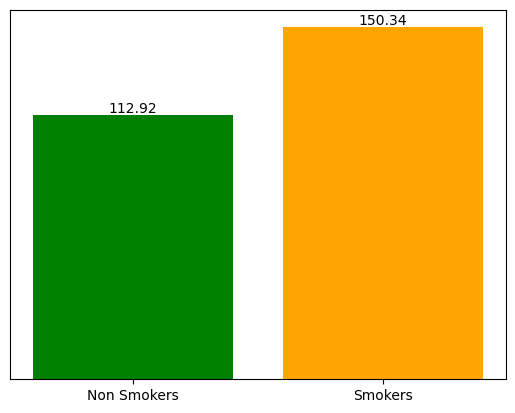

In [69]:
labels = ["Non Smokers", "Smokers"]
values = tri.values
colors = ["green", "orange"]

plt.bar(labels, values, color=colors)
plt.gca().set_yticks([])

for i, v in enumerate(values):
    plt.text(i, v + 1, str(v), ha="center")

plt.xticks(rotation=0)
plt.show()

In [70]:
crea = df.groupby("smoking")["serum creatinine"].mean().round(3)
crea.index = ["Non Smokers", "Smokers"]
crea

Non Smokers    0.849
Smokers        0.949
Name: serum creatinine, dtype: float64

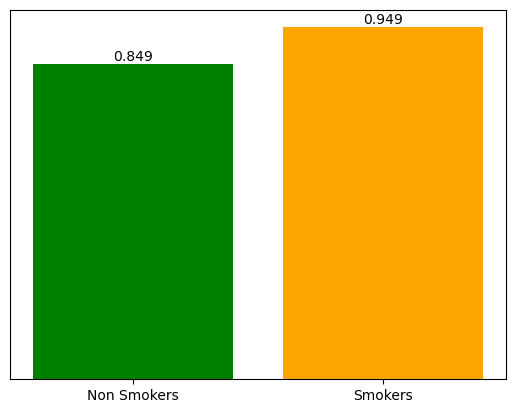

In [72]:
labels = ["Non Smokers", "Smokers"]
values = crea.values
colors = ["green", "orange"]

plt.bar(labels, values, color=colors)
plt.gca().set_yticks([])

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), ha="center")

plt.xticks(rotation=0)
plt.show()

In [73]:
cols = ["AST", "ALT", "Gtp"]

ast_alt_gtp = df.groupby("smoking")[cols].mean().round(2)
ast_alt_gtp.index = ["Non Smokers", "Smokers"]
ast_alt_gtp

,AST,ALT,Gtp
Non Smokers,25.31,24.74,30.89
Smokers,27.69,30.99,55.57


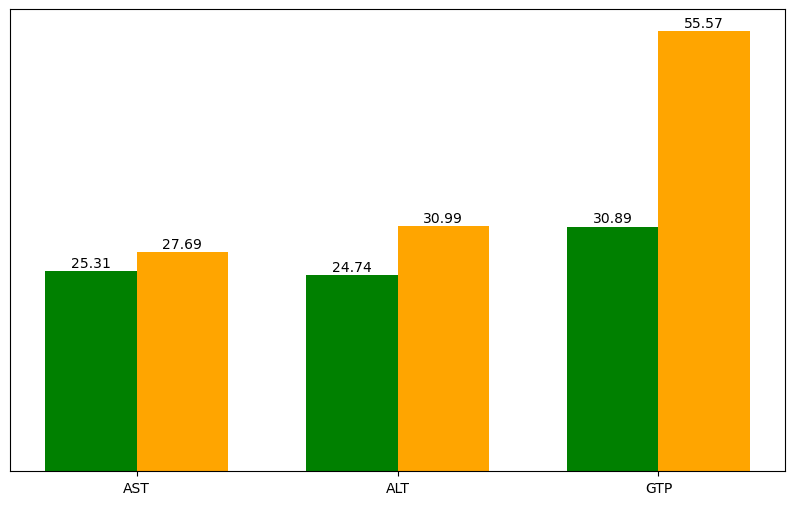

In [76]:
labels = ["AST", "ALT", "GTP"]

non = ast_alt_gtp.loc["Non Smokers"].values
smk = ast_alt_gtp.loc["Smokers"].values

x = np.arange(len(labels))
w = 0.35

plt.figure(figsize=(10,6))

plt.bar(x - w/2, non, w, color="green")
plt.bar(x + w/2, smk, w, color="orange")

plt.xticks(x, labels)
plt.gca().set_yticks([])

for i, v in enumerate(non):
    plt.text(i - w/2, v + 0.5, str(v), ha="center")

for i, v in enumerate(smk):
    plt.text(i + w/2, v + 0.5, str(v), ha="center")


plt.show()